# Curso de Especialização em Ciência de Dados - FURG
## TRATAMENTO DE DADOS COM SCKIT-LEARN

Baseado em Aurelien Geron

In [1]:
# Importação das Bibliotecas
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import sklearn
import scipy
import seaborn as sns

# 2. Obter os dados

In [2]:
import os
os.chdir('G:\Meu Drive\FURG-TCC\TCC - DADOS E ANALISE\DADOS\FINAL')
df_final = pd.read_csv('df_final.csv', sep=",", encoding='UTF-8')

In [3]:
df_final.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 236220 entries, 0 to 236219
Data columns (total 11 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   IBGE7                236220 non-null  int64  
 1   IDHM                 236220 non-null  int64  
 2   NATJU                236220 non-null  int64  
 3   SIT_CADASTRAL        236220 non-null  int64  
 4   CNAE_FISCAL          236220 non-null  int64  
 5   ARRECADACAO          236220 non-null  float64
 6   TEMPO_VIDA           236220 non-null  int64  
 7   PIB_ANO_INIC         236220 non-null  float64
 8   PIB_PERCAPTA_INIC    236220 non-null  float64
 9   PIB_ANO_SITCAD       236219 non-null  float64
 10  PIB_PERCAPTA_SITCAD  236219 non-null  float64
dtypes: float64(5), int64(6)
memory usage: 19.8 MB


In [4]:
df_final.head()

,IBGE7,IDHM,NATJU,SIT_CADASTRAL,CNAE_FISCAL,ARRECADACAO,TEMPO_VIDA,PIB_ANO_INIC,PIB_PERCAPTA_INIC,PIB_ANO_SITCAD,PIB_PERCAPTA_SITCAD
0,2600054,679,2135,8,5611201,1.345094e+08,4,740917.0,769656.0,1220149.0,1247775.0
1,2600054,679,2135,8,5611201,1.345094e+08,3,740917.0,769656.0,1113557.0,1169174.0
2,2600054,679,2135,4,5611201,1.345094e+08,9,853291.0,903642.0,1775522.0,1775699.0
3,2600054,679,2135,4,5611201,1.345094e+08,9,853291.0,903642.0,1775522.0,1775699.0
4,2600054,679,2135,8,5611201,1.345094e+08,2,853291.0,903642.0,1113557.0,1169174.0


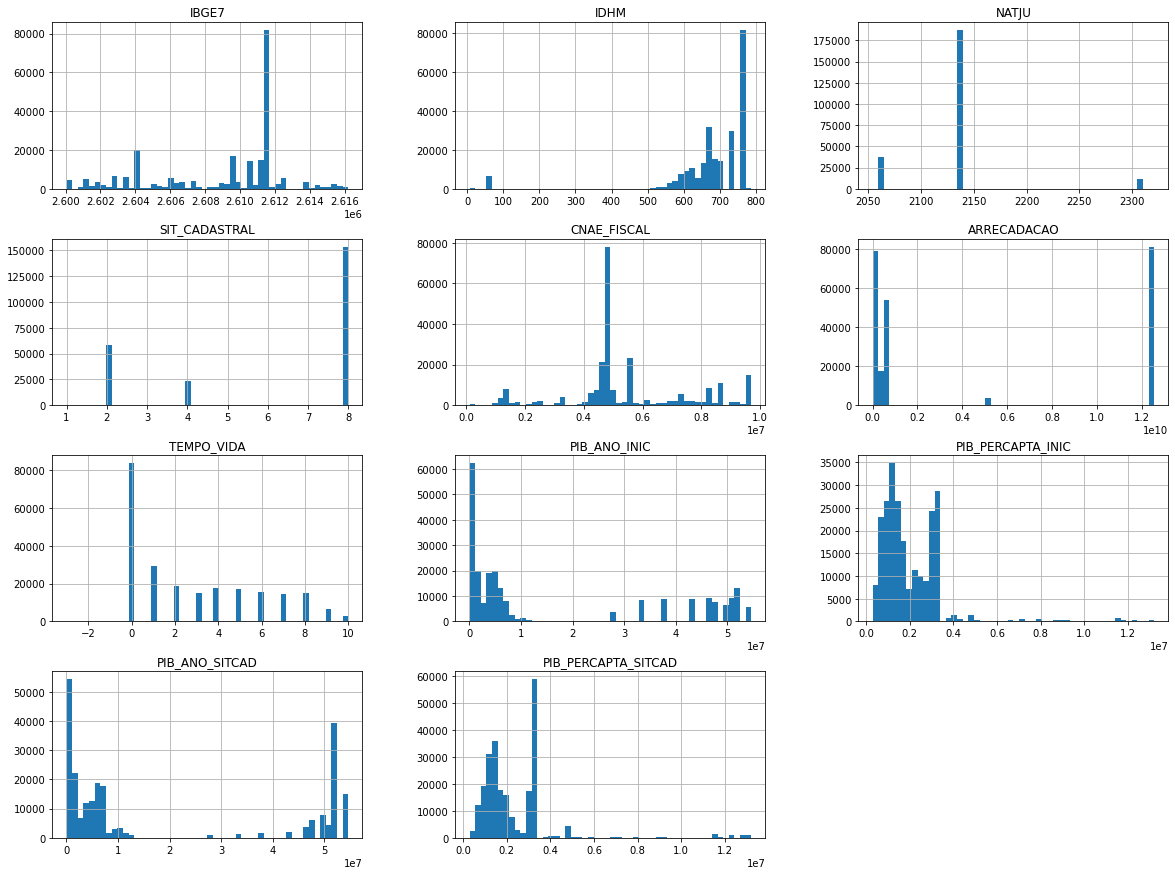

In [5]:
df_final.hist(bins=50, figsize=(20,15))
plt.show()

In [6]:
# para garantir um resultado idêntico a cada execução deste notebook, 
# iniciamos a geração de números aleatórios com a mesma semente (seed)
np.random.seed(42)

In [7]:
latitude = pd.read_csv('lat_municipios.csv',sep=',', encoding='UTF-8')
latitude = latitude.rename(columns={'codigo_ibge':'IBGE7'})
latitude.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5570 entries, 0 to 5569
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   IBGE7         5570 non-null   int64  
 1   nome          5570 non-null   object 
 2   latitude      5570 non-null   float64
 3   longitude     5570 non-null   float64
 4   capital       5570 non-null   int64  
 5   codigo_uf     5570 non-null   int64  
 6   siafi_id      5570 non-null   int64  
 7   ddd           5570 non-null   int64  
 8   fuso_horario  5570 non-null   object 
dtypes: float64(2), int64(5), object(2)
memory usage: 391.8+ KB


In [8]:
df_loc = pd.merge(df_final,latitude, on='IBGE7', how='left')

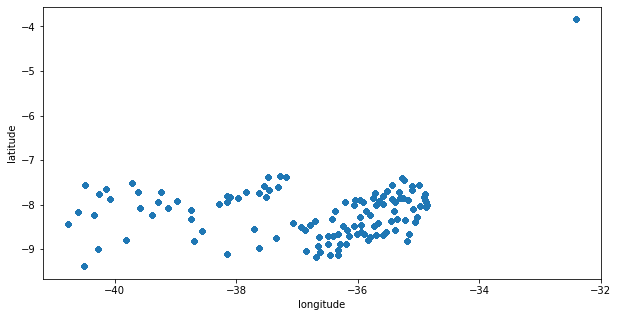

In [9]:
# uma plotagem usando um gráfico de dispersão permite ver a distribuição geográfica das instâncias
df_loc.plot(kind='scatter', x='longitude', y='latitude', figsize=(10,5))
plt.show()

In [10]:
df_final['IBGE7'] = df_final['IBGE7'].astype(str)
df_final['CNAE_FISCAL'] = df_final['CNAE_FISCAL'].astype(str)
df_final['NATJU'] = df_final['NATJU'].astype(str)
df_final['SIT_CADASTRAL'] = df_final['SIT_CADASTRAL'].astype(str)

In [11]:
# exemplo de função simples para separar dados em treino e teste
def split_train_test(data, test_ratio):
    shuffled_indices = np.random.permutation(len(data))
    test_set_size = int(len(data) * test_ratio)
    test_indices = shuffled_indices[:test_set_size]
    train_indices = shuffled_indices[test_set_size:]
    return data.iloc[train_indices], data.iloc[test_indices]

In [12]:
train_set, test_set = split_train_test(df_final, 0.2)
print('train set:', len(train_set))
print('test set: ', len(test_set))

train set: 188976
test set:  47244


In [13]:
# a biblioteca scikit-learn já inclui uma função de separação randomizada, muito semelhante à anterior
from sklearn.model_selection import train_test_split

train_set, test_set = train_test_split(df_final, test_size=0.2, random_state=42)
print('train set:', len(train_set))
print('test set: ', len(test_set))

train set: 188976
test set:  47244


In [14]:
df_final.head()

,IBGE7,IDHM,NATJU,SIT_CADASTRAL,CNAE_FISCAL,ARRECADACAO,TEMPO_VIDA,PIB_ANO_INIC,PIB_PERCAPTA_INIC,PIB_ANO_SITCAD,PIB_PERCAPTA_SITCAD
0,2600054,679,2135,8,5611201,1.345094e+08,4,740917.0,769656.0,1220149.0,1247775.0
1,2600054,679,2135,8,5611201,1.345094e+08,3,740917.0,769656.0,1113557.0,1169174.0
2,2600054,679,2135,4,5611201,1.345094e+08,9,853291.0,903642.0,1775522.0,1775699.0
3,2600054,679,2135,4,5611201,1.345094e+08,9,853291.0,903642.0,1775522.0,1775699.0
4,2600054,679,2135,8,5611201,1.345094e+08,2,853291.0,903642.0,1113557.0,1169174.0


In [15]:
train_set.head()

,IBGE7,IDHM,NATJU,SIT_CADASTRAL,CNAE_FISCAL,ARRECADACAO,TEMPO_VIDA,PIB_ANO_INIC,PIB_PERCAPTA_INIC,PIB_ANO_SITCAD,PIB_PERCAPTA_SITCAD
20106,2602902,686,2135,2,4784900,6.778705e+08,0,9922739.0,4792483.0,9922739.0,4792483.0
39722,2604106,677,2135,8,4781400,6.389138e+08,6,4809622.0,1484016.0,7147897.0,2002930.0
150586,2611606,772,2135,8,1412601,1.255694e+10,4,50515887.0,3140582.0,52404684.0,3199633.0
103096,2610202,569,2135,8,4744099,3.837270e+06,4,113806.0,444067.0,159629.0,603192.0
224186,2612604,59,2135,2,4781400,1.274987e+07,0,285502.0,723283.0,285502.0,723283.0


In [16]:
from sklearn.model_selection import StratifiedShuffleSplit

# usa amostragem estratificada para separar os dados em treino e teste
split = StratifiedShuffleSplit(n_splits=1, test_size=0.2, random_state=42)
for train_index, test_index in split.split(df_final, df_final['SIT_CADASTRAL']):
    strat_train_set = df_final.loc[train_index]
    strat_test_set = df_final.loc[test_index]
print('train set:', len(strat_train_set))
print('test set: ', len(strat_test_set))

train set: 188976
test set:  47244


In [17]:
# percentuais por estrato para 'median_income' no conjunto de treino
strat_train_set['SIT_CADASTRAL'].value_counts() / len(strat_train_set)

8    0.649792
2    0.248412
4    0.097504
3    0.002286
1    0.002006
Name: SIT_CADASTRAL, dtype: float64

In [18]:
# percentuais por estrato para 'median_income' no conjunto de teste
strat_test_set['SIT_CADASTRAL'].value_counts() / len(strat_test_set)

8    0.649797
2    0.248412
4    0.097494
3    0.002286
1    0.002011
Name: SIT_CADASTRAL, dtype: float64

In [19]:
# percentuais no conjunto de dados completo
df_final['SIT_CADASTRAL'].value_counts() / len(df_final)

8    0.649793
2    0.248412
4    0.097502
3    0.002286
1    0.002007
Name: SIT_CADASTRAL, dtype: float64

In [20]:
def sit_cad_proportions(data):
    return data['SIT_CADASTRAL'].value_counts() / len(data)

train_set, test_set = train_test_split(df_final, test_size=0.2, random_state=42)

compare_props = pd.DataFrame({
    'Overall':    sit_cad_proportions(df_final),
    'Random':     sit_cad_proportions(test_set),
    'Stratified': sit_cad_proportions(strat_test_set),
}).sort_index()
compare_props['Rand. %error']  = 100 * compare_props['Random']     / compare_props['Overall'] - 100
compare_props['Strat. %error'] = 100 * compare_props['Stratified'] / compare_props['Overall'] - 100
compare_props

,Overall,Random,Stratified,Rand. %error,Strat. %error
1,0.002007,0.002244,0.002011,11.814346,0.210970
2,0.248412,0.250910,0.248412,1.005453,0.000000
3,0.002286,0.002223,0.002286,-2.777778,0.000000
4,0.097502,0.095568,0.097494,-1.984196,-0.008684
8,0.649793,0.649056,0.649797,-0.113359,0.000651


In [21]:
dftrain = strat_test_set.copy()

In [24]:
dftrain.head()

,IBGE7,IDHM,NATJU,SIT_CADASTRAL,CNAE_FISCAL,ARRECADACAO,TEMPO_VIDA,PIB_ANO_INIC,PIB_PERCAPTA_INIC,PIB_ANO_SITCAD,PIB_PERCAPTA_SITCAD
144091,2611606,772,2135,8,8599605,1.255694e+10,1,42890606.0,2758169.0,46771183.0,2924089.0
157050,2611606,772,2135,8,4781400,1.255694e+10,6,42890606.0,2758169.0,52404684.0,3199633.0
54344,2605202,632,2135,8,5612100,6.712758e+07,1,663159.0,998448.0,749816.0,1120683.0
143056,2611606,772,2135,8,7319003,1.255694e+10,3,50515887.0,3140582.0,51839333.0,3173130.0
178554,2611606,772,2135,8,4322301,1.255694e+10,0,48059861.0,2971826.0,48059861.0,2971826.0


In [22]:
corr_matrix = dftrain.corr()

In [27]:
corr_matrix['TEMPO_VIDA'].sort_values(ascending=False)

TEMPO_VIDA             1.000000
PIB_PERCAPTA_SITCAD    0.085193
PIB_ANO_SITCAD         0.041657
IDHM                   0.016424
ARRECADACAO            0.013693
PIB_ANO_INIC          -0.081707
PIB_PERCAPTA_INIC     -0.160816
Name: TEMPO_VIDA, dtype: float64